<a href="https://colab.research.google.com/github/bama730/CS_4410/blob/main/HW4/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample size: 569
Target size: 569

Evaluating model: GaussianNB
Cross-validation scores: 0.9535, 0.9535, 0.9535, 0.8837, 0.9535, 0.9070, 0.9286, 0.9762, 0.9048, 0.9286 (mean: 0.9343, std: 0.0273)
Accuracy on test set: 0.9580

Confusion Matrix:
[[51  3]
 [ 3 86]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



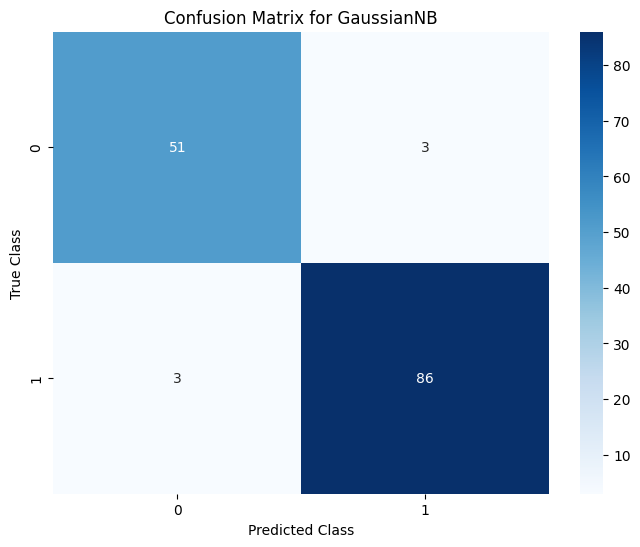


Evaluating model: KNeighborsClassifier
Cross-validation scores: 0.9535, 1.0000, 0.8837, 0.9302, 0.8605, 0.8837, 0.9286, 0.8571, 0.8333, 0.9286 (mean: 0.9059, std: 0.0484)
Accuracy on test set: 0.9650

Confusion Matrix:
[[50  4]
 [ 1 88]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.96      0.99      0.97        89

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



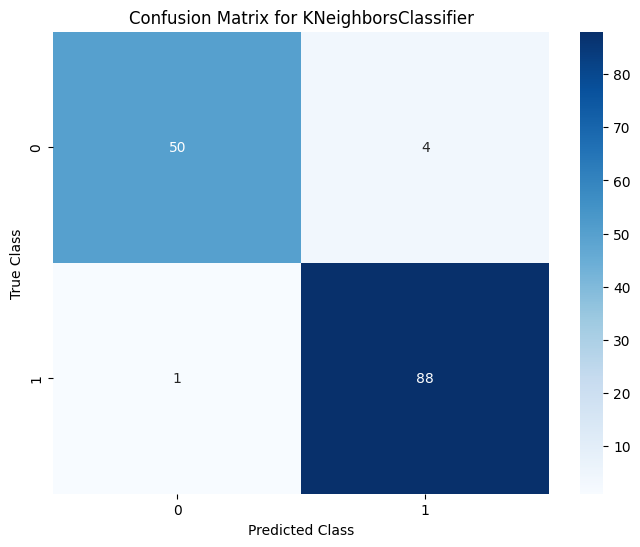


Evaluating model: LogisticRegression
Cross-validation scores: 0.9535, 0.9767, 0.9767, 0.9070, 0.9302, 0.9302, 0.9524, 0.9762, 0.9048, 0.9524 (mean: 0.9460, std: 0.0258)
Accuracy on test set: 0.9650

Confusion Matrix:
[[51  3]
 [ 2 87]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



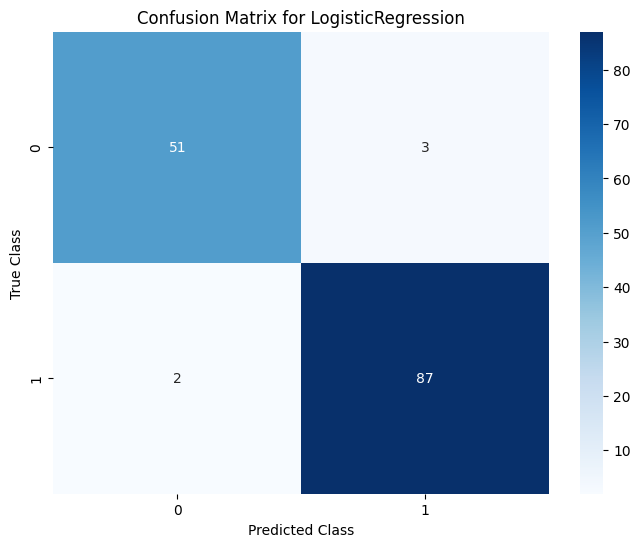


Evaluating model: SVC
Cross-validation scores: 0.9535, 0.9767, 0.8837, 0.9302, 0.9070, 0.9302, 0.8333, 0.9048, 0.7857, 0.9524 (mean: 0.9058, std: 0.0555)
Accuracy on test set: 0.9510

Confusion Matrix:
[[48  6]
 [ 1 88]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        54
           1       0.94      0.99      0.96        89

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



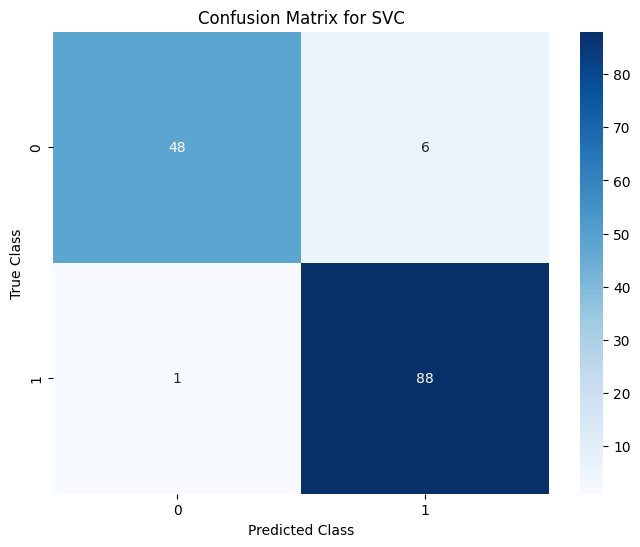


Best model: LogisticRegression


In [7]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
data = breast_cancer.data
target = breast_cancer.target

# Check sample and target sizes
print("Sample size:", data.shape[0])
print("Target size:", target.shape[0])

# Split data for training and testing (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42)

# Define different classification models
estimators = {
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

# K-Fold Cross-Validation with evaluation
for name, model in estimators.items():
    print(f"\nEvaluating model: {name}")

    # KFold object and cross-validation scores
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=model, X=X_train, y=y_train, cv=kfold, scoring='accuracy')
    print(f"Cross-validation scores: {', '.join(f'{score:.4f}' for score in scores)} (mean: {scores.mean():.4f}, std: {scores.std():.4f})")

    # Train the model on the entire training set
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test set: {accuracy:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:\n{cm}")

    # Classification report
    print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")

    # Visualize confusion matrix (optional)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

best_model_name = 'LogisticRegression'

print(f"\nBest model: {best_model_name}")